<a href="https://colab.research.google.com/github/PremDasChelmella/surnoi/blob/main/RandonForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [10]:
df = pd.read_csv("Heart_Disease_Prediction.csv")

In [11]:
df.shape

(270, 14)

In [12]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [13]:
df.tail()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence
269,67,1,4,160,286,0,2,108,1,1.5,2,3,3,Presence


In [20]:
df['Heart Disease'].value_counts()

Heart Disease
Absence     150
Presence    120
Name: count, dtype: int64

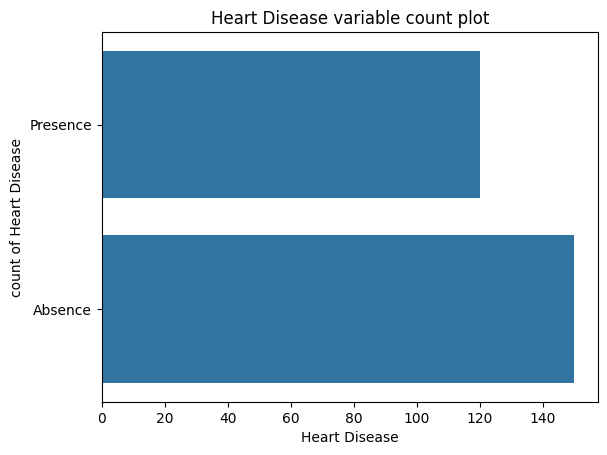

In [21]:
sns.countplot(df['Heart Disease'])
plt.xlabel("Heart Disease")
plt.ylabel("count of Heart Disease")
plt.title("Heart Disease variable count plot")
plt.show()


In [22]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=99)

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
clf = RandomForestClassifier(criterion="gini",max_depth=8,min_samples_split=10,random_state=5)

In [26]:
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, min_samples_split=10, random_state=5)

In [29]:
clf.feature_importances_

array([0.07454632, 0.02870253, 0.1356585 , 0.05290484, 0.04986793,
       0.00316552, 0.00840318, 0.0792314 , 0.05398226, 0.08253997,
       0.06936824, 0.16910191, 0.1925274 ])

In [32]:
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [33]:
y_pred = clf.predict(X_test)

In [34]:
y_pred

array(['Absence', 'Absence', 'Absence', 'Absence', 'Presence', 'Presence',
       'Absence', 'Absence', 'Absence', 'Presence', 'Presence', 'Absence',
       'Presence', 'Absence', 'Presence', 'Presence', 'Presence',
       'Presence', 'Presence', 'Absence', 'Absence', 'Absence',
       'Presence', 'Absence', 'Absence', 'Absence', 'Presence', 'Absence',
       'Absence', 'Presence', 'Absence', 'Absence', 'Presence', 'Absence',
       'Presence', 'Absence', 'Absence', 'Presence', 'Absence',
       'Presence', 'Absence', 'Presence', 'Presence', 'Absence',
       'Presence', 'Presence', 'Presence', 'Presence', 'Absence',
       'Absence', 'Absence', 'Absence', 'Absence', 'Absence', 'Absence',
       'Absence', 'Presence', 'Absence', 'Presence', 'Absence',
       'Presence', 'Absence', 'Absence', 'Presence', 'Absence', 'Absence',
       'Presence', 'Absence'], dtype=object)

In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred,y_test)

array([[32,  8],
       [ 8, 20]])

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7647058823529411

In [37]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf,X_train,y_train,cv=10)

array([0.9047619 , 0.85714286, 0.9       , 0.95      , 0.85      ,
       0.65      , 0.9       , 0.8       , 0.8       , 0.95      ])

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

     Absence       0.80      0.80      0.80        40
    Presence       0.71      0.71      0.71        28

    accuracy                           0.76        68
   macro avg       0.76      0.76      0.76        68
weighted avg       0.76      0.76      0.76        68

